In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [110]:
df_train = pd.read_csv('Training Data.csv')
df_test = pd.read_csv('Test Data.csv')

In [77]:
df_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [79]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


In [80]:
df_train.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [81]:
num_cols = df_train.select_dtypes(exclude='object').columns.to_list()
num_cols.remove('Id')
cat_cols = df_train.select_dtypes(include='object').columns.to_list()

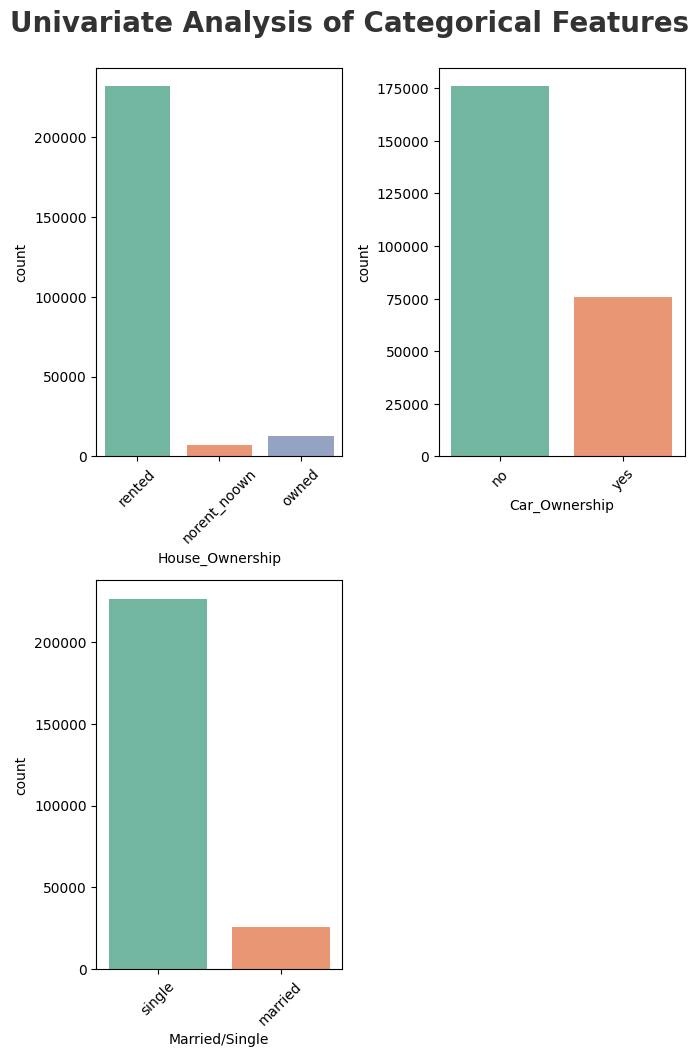

In [82]:
plt.figure(figsize=(7,20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat_col= ['House_Ownership','Car_Ownership','Married/Single']
for i in range(0, len(cat_col)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df_train[cat_col[i]],palette="Set2")
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

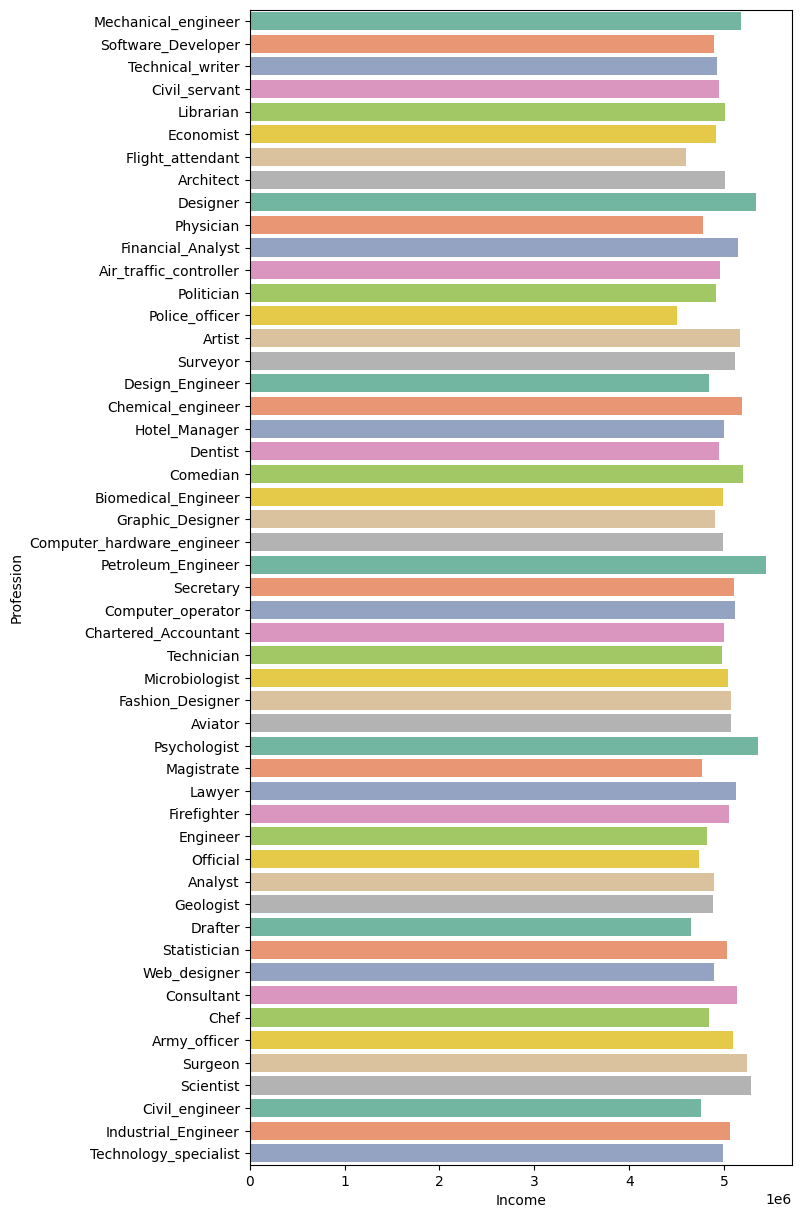

In [83]:
plt.figure(figsize=(7,15))
sns.barplot(y='Profession',x='Income',data=df_train,errorbar=None,palette="Set2")
plt.show()

<Axes: xlabel='count', ylabel='STATE'>

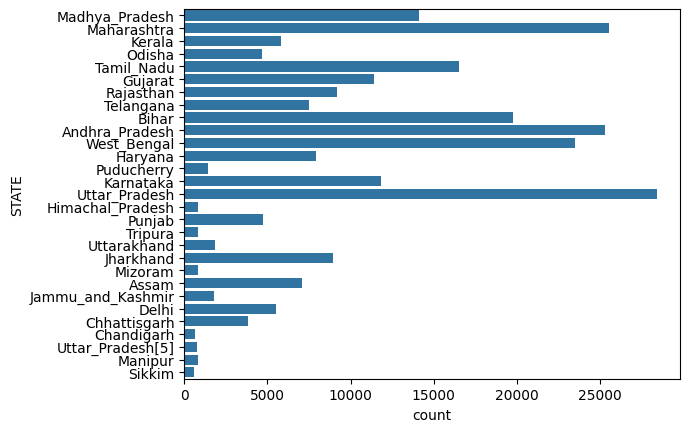

In [84]:
sns.countplot(df_train['STATE'])

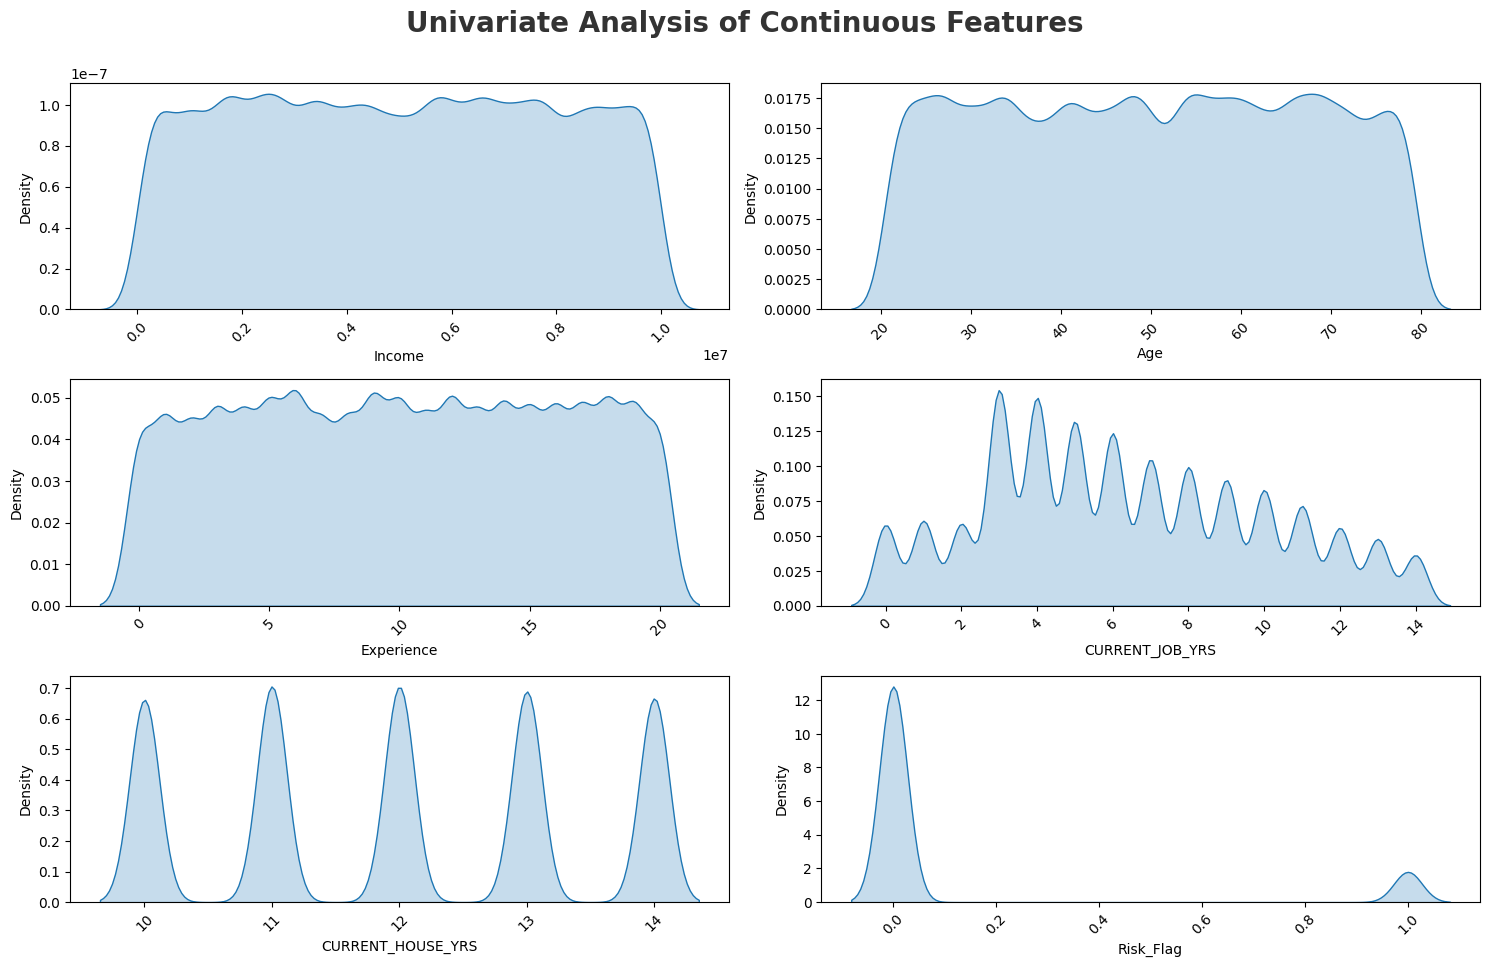

In [85]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Continuous Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_cols)):
    plt.subplot(5,2, i+1)
    sns.kdeplot(x=df_train[num_cols[i]],shade=True,palette="Set2")
    plt.xlabel(num_cols[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

categorical_transformer = Pipeline(
    steps=[
        ("CategoricalImputer", SimpleImputer(strategy="most_frequent")),
        ("LabelEncoder", OrdinalEncoder()),
    ]
)

numerical_transformer = Pipeline(
    steps=[
        ("NumericalImputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

preproccessor = Pipeline(
    steps=[
        ("Categorical", categorical_transformer),
        ("Numerical", numerical_transformer),
    ]
)

In [87]:
def mapper(df:pd.DataFrame,cols:list)->pd.DataFrame:
    df_c = df.copy()
    encodings = {}
    for col in cols:
        oe = OrdinalEncoder()
        df_c[col] = oe.fit_transform(df_c[col].values.reshape(-1,1))
        encodings.update({col:oe.categories_})
    return df_c,encodings

df_train,_ = (mapper(df_train,['House_Ownership','Car_Ownership','Married/Single']))   

In [88]:
df_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1.0,2.0,0.0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,1.0,2.0,0.0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,0.0,2.0,0.0,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,1.0,2.0,1.0,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,1.0,2.0,0.0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [89]:
df_train = df_train.drop(['Id','Profession','CITY','STATE'],axis=1)

<Axes: >

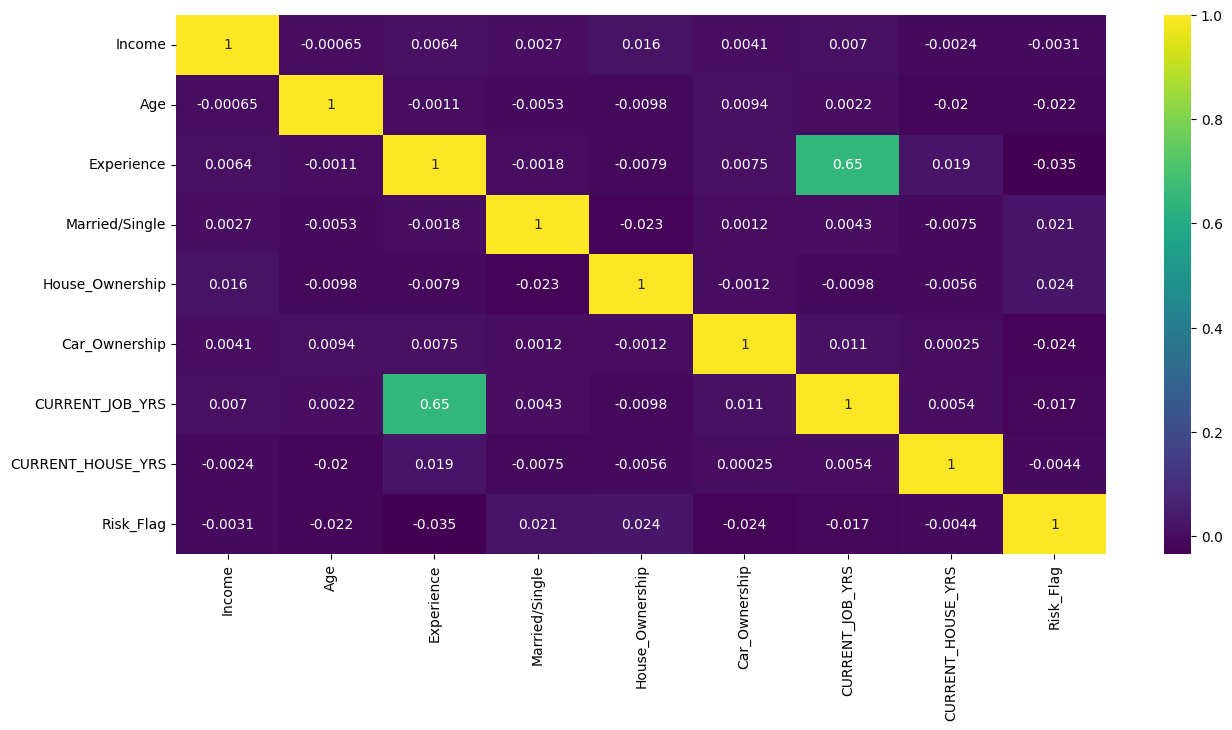

In [90]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_train.corr(),annot=True,cmap='viridis')

In [91]:
df_train = df_train.drop('CURRENT_JOB_YRS',axis=1)

In [92]:
X = df_train.drop('Risk_Flag',axis=1)
y = df_train['Risk_Flag']

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [94]:
X_train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS
157193,5421595,45,4,1.0,2.0,0.0,12
125307,7585042,53,15,1.0,2.0,0.0,13
102075,3319389,35,5,1.0,2.0,1.0,11
235132,3880165,33,1,1.0,2.0,0.0,11
13524,2729670,23,10,1.0,2.0,0.0,13
...,...,...,...,...,...,...,...
176963,9422918,77,11,1.0,2.0,0.0,13
117952,7716196,27,5,1.0,2.0,0.0,14
173685,2557871,55,14,1.0,2.0,1.0,12
43567,8914067,77,18,1.0,2.0,1.0,11


In [95]:
num_cols.remove('Risk_Flag')
num_cols.remove('CURRENT_JOB_YRS')
num_cols.remove('CURRENT_HOUSE_YRS')

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [97]:
X_train.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS
157193,0.145445,-0.293017,-1.014072,1.0,2.0,0.0,12
125307,0.897359,0.175836,0.818194,1.0,2.0,0.0,13
102075,-0.585185,-0.879083,-0.847502,1.0,2.0,1.0,11
235132,-0.390285,-0.996297,-1.513781,1.0,2.0,0.0,11
13524,-0.790144,-1.582363,-0.014654,1.0,2.0,0.0,13


In [98]:
class ModelSelector:
    def __init__(self, models):
        self.models = models
        self.best_model_name = None
        self.best_score = -float('inf')
        self.best_model = None

    def fit_models(self, X_train, y_train, X_test, y_test):
        model_scores = {}
        for model in self.models:
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            model_name = model.__class__.__name__
            model_scores[model_name] = score
            print(f"{model_name}: {score}")

            if score > self.best_score:
                self.best_score = score
                self.best_model_name = model_name
                self.best_model = model

        return f"{self.best_model_name} is Best Performing Model"

    def get_best_model(self):
        return self.best_model

    def get_best_score(self):
        return self.best_score

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf_c = RandomForestClassifier()

from sklearn.linear_model import LogisticRegression
lr_r = LogisticRegression()

from xgboost import XGBClassifier
xgc = XGBClassifier()

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

best_model = ModelSelector([rf_c,lr_r,xgc,gbc,mlpc,abc])
best_model.fit_models(X_train,y_train,X_test,y_test)

RandomForestClassifier: 0.8976058201058201
LogisticRegression: 0.8774867724867725
XGBClassifier: 0.8853174603174603
GradientBoostingClassifier: 0.8776587301587302
MLPClassifier: 0.87744708994709
AdaBoostClassifier: 0.8775793650793651


'RandomForestClassifier is Best Performing Model'

In [100]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy','log_loss'],
    'ccp_alpha': [0.01, 0.1, 0.2],
    'max_features': ['sqrt', 'log2'],
}
Rs = RandomizedSearchCV(best_model.get_best_model(), params, cv=5)
Rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.01, 0.1, 0.2],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100]})

In [101]:
preds = Rs.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,preds),"\n")
print(classification_report(y_test,preds))

0.8774867724867725 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66338
           1       0.00      0.00      0.00      9262

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



In [111]:
id = df_test['ID']
df_test = df_test.drop(['ID','Profession','CITY','STATE','CURRENT_JOB_YRS'],axis=1)

In [112]:
df_test,_ = mapper(df_test,['House_Ownership','Car_Ownership','Married/Single'])

In [113]:
df_test.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS
0,7393090,59,19,1.0,2.0,0.0,13
1,1215004,25,5,1.0,2.0,0.0,10
2,8901342,50,12,1.0,2.0,0.0,14
3,1944421,49,9,0.0,2.0,1.0,12
4,13429,25,18,1.0,2.0,1.0,11


In [114]:
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [115]:
df_test.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS
0,0.830645,0.527476,1.484473,1.0,2.0,0.0,13
1,-1.316572,-1.465150,-0.847502,1.0,2.0,0.0,10
2,1.354844,0.000016,0.318485,1.0,2.0,0.0,14
3,-1.063060,-0.058591,-0.181224,0.0,2.0,1.0,12
4,-1.734184,-1.465150,1.317903,1.0,2.0,1.0,11


In [116]:
test_preds = Rs.predict(df_test)

In [118]:
pd.DataFrame({'ID':id,'Pred_Risk_Flag':test_preds}).to_csv('submission.csv',index=False)

In [122]:
pd.read_csv('submission.csv')

,ID,Pred_Risk_Flag
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0
